## - Steganography Image

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = input('enter the bigger image :')

enter the bigger image :StegnoImage.jpg


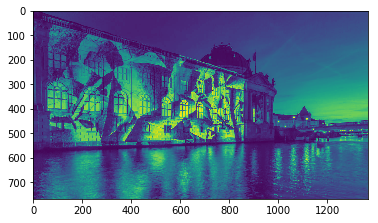

In [3]:
image = cv2.imread(img,cv2.IMREAD_GRAYSCALE)
plt.imshow(image)
cv2.imshow('Main Image',image)
cv2.waitKey(0)
cv2.destroyAllWindows();

In [4]:
image_Pixels = image
image_Pixels.shape

(768, 1366)

In [5]:
image_Pixels = image_Pixels.reshape(-1,1)
image_Pixels.shape

(1049088, 1)

In [6]:
img2 = input('enter the smaller image:')

enter the smaller image:blastoise.png


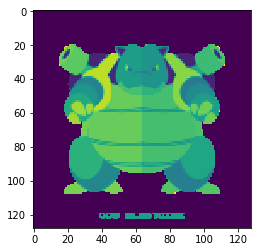

In [7]:
small_image = cv2.imread(img2,cv2.IMREAD_GRAYSCALE)
plt.imshow(small_image)
cv2.imshow('small_image',small_image)
cv2.waitKey(0)
cv2.destroyAllWindows();

In [8]:
small_image_Pixels = np.asarray(small_image)
small_image_Pixels = small_image_Pixels.reshape(-1,1)
small_image_Pixels.shape

(16384, 1)

In [9]:
def get8bitdata(Pixels):
    lis = []
    for i in Pixels[:,0]:
        lis.append(format(i,'08b'))
    return np.array(lis)

In [10]:
small_image_8_bit = get8bitdata(small_image_Pixels)
small_image_8_bit[small_image_8_bit != '00000000']

array(['11001010', '11001010', '11001001', ..., '10001111', '10001111',
       '10010000'], dtype='<U8')

In [11]:
def formatMainImage(image_Pixels, smallImagevalues, fromlast):
    n = image_Pixels.shape[0]
    m = image_Pixels.shape[1]
    k = 0
    count = 0
    for i in range(n):
        for j in range(m-fromlast,m,1):
            if k < len(smallImagevalues):
                Pixel_val = image_Pixels[i,j]
                Pixel_val_bin_str = format(Pixel_val, '08b')
                new_Pixel = Pixel_val_bin_str[:-1] + smallImagevalues[k]
                k += 1
                new_Pixel = int(new_Pixel,2)
                image_Pixels[i,j] = new_Pixel
            elif count < 24:
                Pixel_val = image_Pixels[i,j]
                Pixel_val_bin_str = format(Pixel_val, '08b')
                new_Pixel = Pixel_val_bin_str[:-1] + '1'
                new_Pixel = int(new_Pixel,2)
                image_Pixels[i,j] = new_Pixel
                count += 1
    return image_Pixels

In [12]:
def hide(image, small_image_8_bit):
    image_Pixels = np.asarray(image)
    n = image_Pixels.shape[0] # 768
    m = image_Pixels.shape[1] # 1366
    total_pixels_to_be_modified_in_a_row = ((len(list(small_image_8_bit))*8)//n)  + 1
    print(total_pixels_to_be_modified_in_a_row)
    if(total_pixels_to_be_modified_in_a_row > (m//2)):
        print("Not Possible")
        return None
    Modified_Image = formatMainImage(image_Pixels, "".join(list(small_image_8_bit)), total_pixels_to_be_modified_in_a_row)
    return Modified_Image, total_pixels_to_be_modified_in_a_row

In [13]:
Modified_Image, fromLast = hide(image, small_image_8_bit)
if not Modified_Image.all():
    cv2.imshow('Modified Image',Modified_Image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print('image cannot be encoded.Please try again!')

171


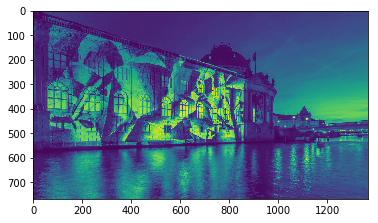

In [14]:
plt.imshow(Modified_Image)

In [15]:
def getInImage(Modified_Image, fromLast):
    n = Modified_Image.shape[0]
    m = Modified_Image.shape[1]
    k = 0
    count = 0
    lis = []
    lis1 = []
    for i in range(n):
        for j in range(m - fromLast, m, 1):
            if count >= 3 :
                break
            if(len(lis1) == 8):
                str1 = "".join(lis1)
                if str1 == '11111111' :
                    count += 1
                else:
                    count = 0
                lis.append(str1)
                lis1 = []
            lis1.append(bin(Modified_Image[i,j])[-1])
        else:
            continue
        break
    return lis

In [16]:
lis = getInImage(Modified_Image, fromLast)
len(lis)

16387

In [17]:
lis1 = lis[:len(lis)-3]
len(lis1)

16384

In [18]:
foundImage = np.array([int(i,2) for i in lis1])
foundImage = foundImage.reshape(128,128)

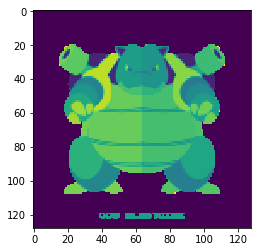

In [19]:
plt.imshow(foundImage)

In [20]:
np.array_equal(foundImage, small_image)

True